### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


%matplotlib inline
sns.set_style('darkgrid')
sns.set(font_scale=1.2)

from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.utils import shuffle

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from tensorflow.keras.optimizers import Adam

import keras
from keras.models import save_model, Sequential
from keras.layers import Activation, BatchNormalization, Dense
from keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

np.random.seed(0)
tf.random.set_seed(0)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Data Exploration

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_vacc_effective_2,opinion_seas_vacc_effective_3,opinion_seas_vacc_effective_4,opinion_seas_vacc_effective_5,opinion_seas_risk_2,opinion_seas_risk_3,opinion_seas_risk_4,opinion_seas_risk_5,opinion_seas_sick_from_vacc_2,opinion_seas_sick_from_vacc_3,opinion_seas_sick_from_vacc_4,opinion_seas_sick_from_vacc_5,seasonal_vaccine
0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1
2,0,1,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
3,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23183,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0
23184,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0
23185,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
23186,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1


In [4]:
df.isnull().sum()

behavioral_antiviral_meds        0
behavioral_avoidance             0
behavioral_face_mask             0
behavioral_wash_hands            0
behavioral_large_gatherings      0
behavioral_outside_home          0
behavioral_touch_face            0
doctor_recc_seasonal             0
chronic_med_condition            0
child_under_6_months             0
health_worker                    0
opinion_seas_vacc_effective_2    0
opinion_seas_vacc_effective_3    0
opinion_seas_vacc_effective_4    0
opinion_seas_vacc_effective_5    0
opinion_seas_risk_2              0
opinion_seas_risk_3              0
opinion_seas_risk_4              0
opinion_seas_risk_5              0
opinion_seas_sick_from_vacc_2    0
opinion_seas_sick_from_vacc_3    0
opinion_seas_sick_from_vacc_4    0
opinion_seas_sick_from_vacc_5    0
seasonal_vaccine                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23188 entries, 0 to 23187
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   behavioral_antiviral_meds      23188 non-null  int64
 1   behavioral_avoidance           23188 non-null  int64
 2   behavioral_face_mask           23188 non-null  int64
 3   behavioral_wash_hands          23188 non-null  int64
 4   behavioral_large_gatherings    23188 non-null  int64
 5   behavioral_outside_home        23188 non-null  int64
 6   behavioral_touch_face          23188 non-null  int64
 7   doctor_recc_seasonal           23188 non-null  int64
 8   chronic_med_condition          23188 non-null  int64
 9   child_under_6_months           23188 non-null  int64
 10  health_worker                  23188 non-null  int64
 11  opinion_seas_vacc_effective_2  23188 non-null  int64
 12  opinion_seas_vacc_effective_3  23188 non-null  int64
 13  opinion_seas_vac

In [6]:
df.describe(include='all')

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_vacc_effective_2,opinion_seas_vacc_effective_3,opinion_seas_vacc_effective_4,opinion_seas_vacc_effective_5,opinion_seas_risk_2,opinion_seas_risk_3,opinion_seas_risk_4,opinion_seas_risk_5,opinion_seas_sick_from_vacc_2,opinion_seas_sick_from_vacc_3,opinion_seas_sick_from_vacc_4,opinion_seas_sick_from_vacc_5,seasonal_vaccine
count,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000
mean,0.049336,0.731197,0.068139,0.829481,0.358289,0.336855,0.684319,0.331335,0.284199,0.084009,0.113723,0.083923,0.041918,0.446308,0.382870,0.341772,0.022296,0.295325,0.114585,0.290495,0.003019,0.186131,0.065163,0.477704
std,0.216573,0.443347,0.251989,0.376096,0.479508,0.472645,0.464796,0.470703,0.451042,0.277407,0.317481,0.277278,0.200407,0.497120,0.486098,0.474314,0.147648,0.456199,0.318527,0.454001,0.054862,0.389221,0.246819,0.499513
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.shape

(23188, 24)

### Train Test Split

In [8]:
X = df.iloc[:,0:23]
y = df.iloc[:,23]

In [9]:
X

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_vacc_effective_2,opinion_seas_vacc_effective_3,opinion_seas_vacc_effective_4,opinion_seas_vacc_effective_5,opinion_seas_risk_2,opinion_seas_risk_3,opinion_seas_risk_4,opinion_seas_risk_5,opinion_seas_sick_from_vacc_2,opinion_seas_sick_from_vacc_3,opinion_seas_sick_from_vacc_4,opinion_seas_sick_from_vacc_5
0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
2,0,1,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23183,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0
23184,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
23185,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
23186,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0


In [10]:
y

0        0
1        1
2        1
3        0
4        0
        ..
23183    0
23184    0
23185    0
23186    1
23187    0
Name: seasonal_vaccine, Length: 23188, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18550, 23), (4638, 23), (18550,), (4638,))

### Model Training

### Using DNN

In [13]:
def build_classifier():
    model = Sequential()
    model.add(Dense(units=50,activation='relu',input_dim=23))
    model.add(Dense(units=1,activation='sigmoid'))
    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=["accuracy"])
    return model

In [14]:
model = KerasClassifier(build_fn=build_classifier)

In [15]:
cv = cross_val_score(estimator=model,X=X_train, y=y_train, cv=10, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   13.2s finished


In [16]:
cv

array([0.75094342, 0.76172507, 0.7579515 , 0.75148249, 0.76388139,
       0.74824798, 0.74393529, 0.7504043 , 0.74285716, 0.74555254])

In [17]:
cv.mean()

0.751698112487793

In [18]:
cv.std()

0.006917096327855786

### Model Tuning

In [19]:
def build_classifier(optimizer):
    model = Sequential()
    model.add(Dense(units=50,activation='relu',input_dim=23))
    model.add(Dense(units=1,activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=["accuracy"])
    return model

In [20]:
model = KerasClassifier(build_fn=build_classifier)

In [21]:
params = {'batch_size':[200,500,1000],
          'epochs' : [30,60,90],
          'optimizer' : ['Adam', 'RMSprop','SGD']
         
         }

### Use RandomSearch CV

In [22]:
randomsearch = RandomizedSearchCV(estimator=model, param_distributions=params,n_iter=30,
                                  scoring='accuracy',n_jobs=-1,cv=5,random_state=0)

In [23]:
randomsearchcv = randomsearch.fit(X_train, y_train)

Epoch 1/90
19/19 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.5480
Epoch 2/90
19/19 [==============================] - 0s 2ms/step - loss: 0.6352 - accuracy: 0.6842
Epoch 3/90
19/19 [==============================] - 0s 2ms/step - loss: 0.5989 - accuracy: 0.7213
Epoch 4/90
19/19 [==============================] - 0s 2ms/step - loss: 0.5723 - accuracy: 0.7308
Epoch 5/90
19/19 [==============================] - 0s 2ms/step - loss: 0.5535 - accuracy: 0.7344
Epoch 6/90
19/19 [==============================] - 0s 2ms/step - loss: 0.5405 - accuracy: 0.7398
Epoch 7/90
19/19 [==============================] - 0s 2ms/step - loss: 0.5312 - accuracy: 0.7465
Epoch 8/90
19/19 [==============================] - 0s 2ms/step - loss: 0.5248 - accuracy: 0.7534
Epoch 9/90
19/19 [==============================] - 0s 2ms/step - loss: 0.5203 - accuracy: 0.7553
Epoch 10/90
19/19 [==============================] - 0s 2ms/step - loss: 0.5171 - accuracy: 0.7560
Epoch 11/90
19/19 [

19/19 [==============================] - 0s 2ms/step - loss: 0.4933 - accuracy: 0.7693
Epoch 84/90
19/19 [==============================] - 0s 2ms/step - loss: 0.4932 - accuracy: 0.7697
Epoch 85/90
19/19 [==============================] - 0s 2ms/step - loss: 0.4929 - accuracy: 0.7695
Epoch 86/90
19/19 [==============================] - 0s 2ms/step - loss: 0.4929 - accuracy: 0.7695
Epoch 87/90
19/19 [==============================] - 0s 822us/step - loss: 0.4926 - accuracy: 0.7696
Epoch 88/90
19/19 [==============================] - 0s 1ms/step - loss: 0.4926 - accuracy: 0.7684
Epoch 89/90
19/19 [==============================] - 0s 2ms/step - loss: 0.4926 - accuracy: 0.7694
Epoch 90/90
19/19 [==============================] - 0s 2ms/step - loss: 0.4924 - accuracy: 0.7699


In [24]:
randomsearchcv.best_params_

{'optimizer': 'Adam', 'epochs': 90, 'batch_size': 1000}

In [25]:
randomsearchcv.best_score_

0.7631266846361185

## Final Model

In [26]:
model = Sequential()
model.add(Dense(units=50,activation='relu',input_dim=23))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=["accuracy"])

In [27]:
checkpointcb = keras.callbacks.ModelCheckpoint("BestModel.h5",save_best_only=True)

In [28]:
earlystoppingcb = keras.callbacks.EarlyStopping(patience=10, verbose=1)

In [29]:
model_history = model.fit(X_train, y_train,batch_size=1000,epochs=90,validation_data=(X_test,y_test),
                          validation_split=0.2, verbose=2, callbacks=[checkpointcb,earlystoppingcb])

Epoch 1/90
15/15 - 0s - loss: 0.7262 - accuracy: 0.4082 - val_loss: 0.7025 - val_accuracy: 0.4671
Epoch 2/90
15/15 - 0s - loss: 0.6862 - accuracy: 0.5447 - val_loss: 0.6689 - val_accuracy: 0.6151
Epoch 3/90
15/15 - 0s - loss: 0.6530 - accuracy: 0.6469 - val_loss: 0.6382 - val_accuracy: 0.6792
Epoch 4/90
15/15 - 0s - loss: 0.6218 - accuracy: 0.6980 - val_loss: 0.6088 - val_accuracy: 0.7038
Epoch 5/90
15/15 - 0s - loss: 0.5934 - accuracy: 0.7168 - val_loss: 0.5834 - val_accuracy: 0.7159
Epoch 6/90
15/15 - 0s - loss: 0.5699 - accuracy: 0.7282 - val_loss: 0.5640 - val_accuracy: 0.7261
Epoch 7/90
15/15 - 0s - loss: 0.5527 - accuracy: 0.7371 - val_loss: 0.5503 - val_accuracy: 0.7302
Epoch 8/90
15/15 - 0s - loss: 0.5408 - accuracy: 0.7422 - val_loss: 0.5403 - val_accuracy: 0.7358
Epoch 9/90
15/15 - 0s - loss: 0.5321 - accuracy: 0.7452 - val_loss: 0.5335 - val_accuracy: 0.7383
Epoch 10/90
15/15 - 0s - loss: 0.5260 - accuracy: 0.7489 - val_loss: 0.5282 - val_accuracy: 0.7431
Epoch 11/90
15/15 -

In [30]:
model_history.params

{'verbose': 2, 'epochs': 90, 'steps': 15}

In [31]:
model_history.history

{'loss': [0.7262367606163025,
  0.6862363219261169,
  0.6529820561408997,
  0.6218076348304749,
  0.5933908820152283,
  0.5698697566986084,
  0.5526931881904602,
  0.5408387184143066,
  0.5321394801139832,
  0.5260418057441711,
  0.5216111540794373,
  0.518239438533783,
  0.5161149501800537,
  0.513800323009491,
  0.5123140811920166,
  0.5104902386665344,
  0.5091016292572021,
  0.5080222487449646,
  0.5070940256118774,
  0.5061779022216797,
  0.5055675506591797,
  0.5049002170562744,
  0.5043712258338928,
  0.5038365125656128,
  0.5036329030990601,
  0.502886176109314,
  0.5025566816329956,
  0.5022476315498352,
  0.5019599795341492,
  0.5015142560005188,
  0.5011560320854187,
  0.500998854637146,
  0.5009815096855164,
  0.5006290674209595,
  0.5001384615898132,
  0.49987438321113586,
  0.49974092841148376,
  0.4994394779205322,
  0.4992365837097168,
  0.49896439909935,
  0.4986884891986847,
  0.49845731258392334,
  0.49838584661483765,
  0.4981429874897003,
  0.4979011118412018,
  0.

In [32]:
pd.DataFrame(model_history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.726237,0.408221,0.702454,0.467116
1,0.686236,0.544744,0.668922,0.615094
2,0.652982,0.646900,0.638243,0.679245
3,0.621808,0.697978,0.608798,0.703774
4,0.593391,0.716846,0.583407,0.715903
...,...,...,...,...
76,0.493730,0.768127,0.505942,0.757682
77,0.493126,0.768261,0.505999,0.757951
78,0.493120,0.769474,0.506087,0.756604
79,0.492909,0.768733,0.506114,0.757412


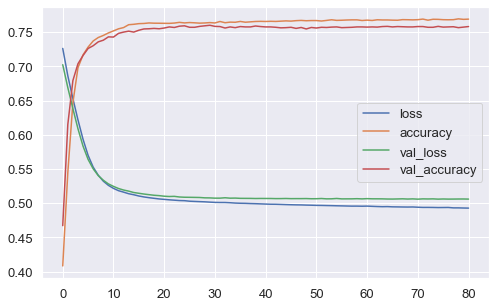

In [33]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca()#.set_ylim(0,1)
plt.show()

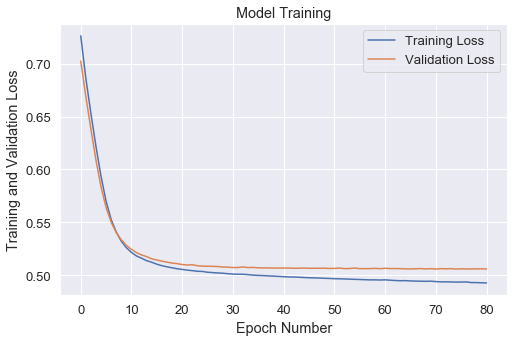

In [34]:
plt.figure(figsize=(8,5))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model Training")
plt.ylabel("Training and Validation Loss")
plt.xlabel("Epoch Number")
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

### Model Evaluation

In [35]:
model.get_weights()

[array([[-3.06038678e-01,  2.74047732e-01, -1.76068619e-01, ...,
          4.09891009e-02,  1.25111789e-01,  4.41766307e-02],
        [ 1.61818400e-01,  2.18484372e-01,  1.89327657e-01, ...,
         -7.25158677e-02,  1.15903094e-01, -6.16292469e-02],
        [ 9.33187548e-03,  1.87453941e-01, -1.69864640e-01, ...,
         -1.88707128e-01, -9.87163782e-02,  1.73237279e-01],
        ...,
        [ 5.38968503e-01,  2.67702818e-01,  1.33184761e-01, ...,
          7.76211619e-02,  3.01642537e-01, -4.26986226e-04],
        [-2.10373774e-01,  1.43130586e-01, -1.69588730e-01, ...,
          1.63149267e-01,  1.91383585e-01,  3.12648453e-02],
        [-3.27758715e-02,  2.56173581e-01,  1.12984240e-01, ...,
          4.26881798e-02, -5.28763354e-01,  1.35979615e-02]], dtype=float32),
 array([ 2.75458187e-01,  3.52935374e-01, -1.35128051e-01,  2.96047002e-01,
         2.16938838e-01,  1.69275194e-01, -1.00012600e-01, -7.43732154e-02,
        -8.01736265e-02, -1.83250625e-02,  3.03188831e-01,  2.

In [36]:
test_loss, test_acc = model.evaluate(X_test,y_test)

145/145 [==============================] - 0s 907us/step - loss: 0.4986 - accuracy: 0.7594


In [37]:
print("Test Accuracy: {}".format(test_acc))

Test Accuracy: 0.7593790292739868


### Model Prediction

In [38]:
y_pred = model.predict(X_test)

In [39]:
y_pred

array([[0.34215066],
       [0.5052926 ],
       [0.69520706],
       ...,
       [0.4919641 ],
       [0.7070197 ],
       [0.5710155 ]], dtype=float32)

In [40]:
y_pred.round(2)

array([[0.34],
       [0.51],
       [0.7 ],
       ...,
       [0.49],
       [0.71],
       [0.57]], dtype=float32)

In [41]:
y_class_pred =  model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [42]:
y_class_pred 

array([[0],
       [1],
       [1],
       ...,
       [0],
       [1],
       [1]])

In [43]:
y_test

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [44]:
cm = confusion_matrix(y_test,y_class_pred)
cm

array([[1918,  529],
       [ 587, 1604]], dtype=int64)

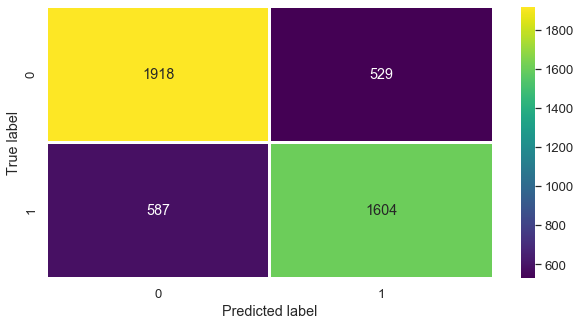

In [45]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [46]:
print(classification_report(y_test,y_class_pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77      2447
           1       0.75      0.73      0.74      2191

    accuracy                           0.76      4638
   macro avg       0.76      0.76      0.76      4638
weighted avg       0.76      0.76      0.76      4638

